In [7]:
#RUNGE-KUTTA 4
#f funcion
#Y0,T0 initial conditions
#Tn end of the interval
#p number of steps
function RKS(F,Y0,t0,tn,p)
Yk=Y0    
tk=t0
delta=(tn-t0)/p
A = zeros(Float64,p,5)
    for i in 1:p       
        A[i,1] = tk     
        A[i,2:5]= Yk[:]       
        K1 = F(tk,Yk)
        tmid = tk + delta/2
        K2 = F(tmid,Yk+(K1.*(delta/2)))
        K3 = F(tmid,Yk+(K2.*(delta/2)))
        tk = tk+delta 
        K4 = F(tk,Yk + K3.*delta)
        K  = (K1+(K2.*2)+(K3.*2)+K4)./6
        Yk = Yk + (K.*delta)      
    end  
return A
end

RKS (generic function with 1 method)

In [8]:
#Hodgkin y Huxley model

pulse(x) = (x<0.027) ? (x<0.025) ? 0 : -20 : 0

vrest=-70     
Ena=55       
Ek=-82       
El=-59        
gkbar=24.34   
gnabar=70.7   
gl=0.3        
Cm=0.001      

alphan(v) = 0.01*(10-(v-vrest))/(exp(0.1*(10-(v-vrest)))-1)

betan(v)=0.125*exp(-(v-vrest)/80)

alpham(v)=0.1*(25-(v-vrest))/(exp(0.1*(25-(v-vrest)))-1)

betam(v)=4*exp(-(v-vrest)/18)

alphah(v)=0.07*exp(-0.05*(v-vrest))

betah(v)=1/(exp(0.1*(30-(v-vrest)))+1)

dv(t,v,n,m,h) = -(gnabar*(m^3)*h*(v - Ena)+gkbar*(n^4)*(v - Ek)+gl*(v - El)+pulse(t))/Cm
dn(t,v,n,m,h) = 1000*(alphan(v)*(1-n)-betan(v)*n)
dm(t,v,n,m,h) = 1000*(alpham(v)*(1-m)-betam(v)*m)
dh(t,v,n,m,h) = 1000*(alphah(v)*(1-h)-betah(v)*h)

#Initial condition

Y0=[vrest,0.315,0.042,0.608]

H(t,Y)=[dv(t,Y[1],Y[2],Y[3],Y[4]),dn(t,Y[1],Y[2],Y[3],Y[4]),dm(t,Y[1],Y[2],Y[3],Y[4]),dh(t,Y[1],Y[2],Y[3],Y[4])]

H (generic function with 1 method)

In [9]:
D = RKS(H,Y0,0,0.1,2000)

2000×5 Matrix{Float64}:
 0.0      -70.0     0.315     0.042      0.608
 5.0e-5   -69.9579  0.315027  0.044105   0.607926
 0.0001   -69.914   0.31506   0.0458577  0.607844
 0.00015  -69.8687  0.3151    0.0473281  0.607753
 0.0002   -69.8222  0.315145  0.0485726  0.607653
 0.00025  -69.775   0.315196  0.0496359  0.607544
 0.0003   -69.7272  0.315254  0.050554   0.607426
 0.00035  -69.6791  0.315318  0.0513556  0.607298
 0.0004   -69.6308  0.315388  0.0520635  0.607161
 0.00045  -69.5826  0.315464  0.0526961  0.607015
 0.0005   -69.5345  0.315546  0.0532679  0.60686
 0.00055  -69.4866  0.315635  0.0537906  0.606696
 0.0006   -69.4391  0.315729  0.0542735  0.606522
 ⋮                                       
 0.0994   -68.8659  0.33519   0.0604509  0.555995
 0.09945  -68.8659  0.33519   0.0604509  0.555994
 0.0995   -68.8659  0.33519   0.0604509  0.555994
 0.09955  -68.8659  0.33519   0.0604509  0.555994
 0.0996   -68.8659  0.33519   0.0604509  0.555994
 0.09965  -68.8659  0.33519   0.060450

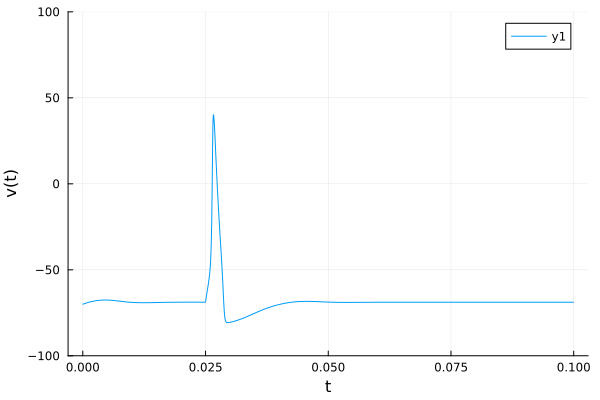

In [18]:
using Plots
plot(D[:,1],D[:,2],ylims=(-100,100),ylabel="v(t)",xlabel="t")

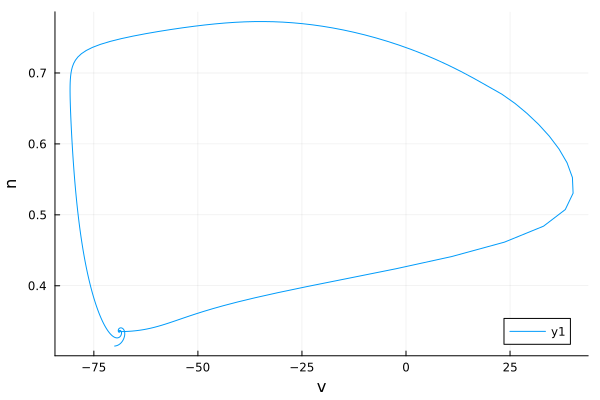

In [19]:
plot(D[:,2],D[:,3],ylabel="n",xlabel="v")

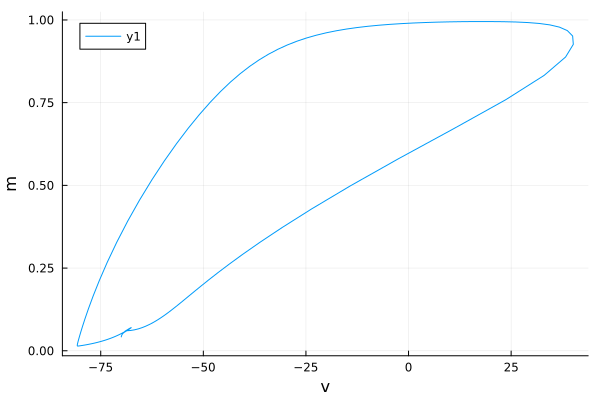

In [17]:
plot(D[:,2],D[:,4],ylabel="m",xlabel="v")

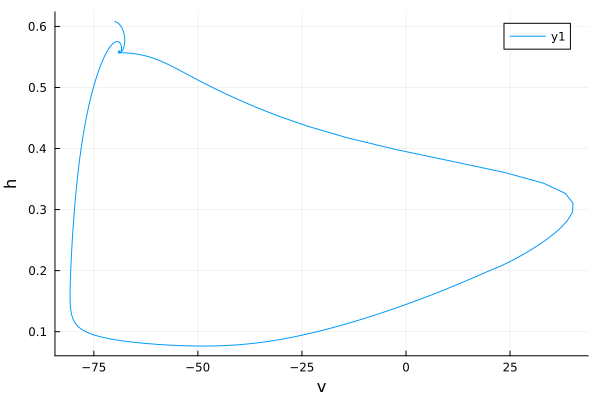

In [15]:
plot(D[:,2],D[:,5],ylabel="h",xlabel="v")